In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src import *
from model.classification import *

from tqdm.notebook import tqdm
from IPython.display import HTML
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import torch.nn as nn
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [3]:
fold = 0
model, params = load_model_locally(f'cross_validation_25/{fold}', model_name='rvce')

In [4]:
files = [
#     '20190819-Ricany-L3-in-MVI_0006',
#     '20190819-Ricany-L9-in-MVI_0008',
#     '20190819-Kutna Hora-L1-out-MVI_0007',
    '20190819-Kutna Hora-L14-out-MVI_0005'
]

datapool = DataPool(files, 6.0, 0.75, tqdm=tqdm)

Video loading:   0%|          | 0/1 [00:00<?, ?it/s]

In [44]:
for video in datapool:
    sr = params.sr
    audio = video.signal
    events = video.events

    samples, labels = create_dataset_sequentially(audio, sr, events, window_length=params.window_length)

In [69]:
d = defaultdict(lambda: [])

params.n_mels = 64
params.n_mfcc = 0
params.normalization = Normalization.NONE
transform = create_transformation(params)

for sample, label in zip(samples, labels):
    features = transform(sample).squeeze()
    d[label].append(features)

In [75]:
d1 = defaultdict(lambda: [])

params.n_mels = 64
params.n_mfcc = 0
params.normalization = Normalization.GLOBAL
transform = create_transformation(params)

for sample, label in zip(samples, labels):
    features = transform(sample).squeeze()
    d1[label].append(features)

In [67]:
d.keys()

dict_keys([0, 2, 1, 3])

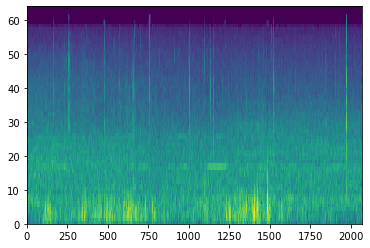

In [79]:
plt.pcolormesh(d[0][0]);

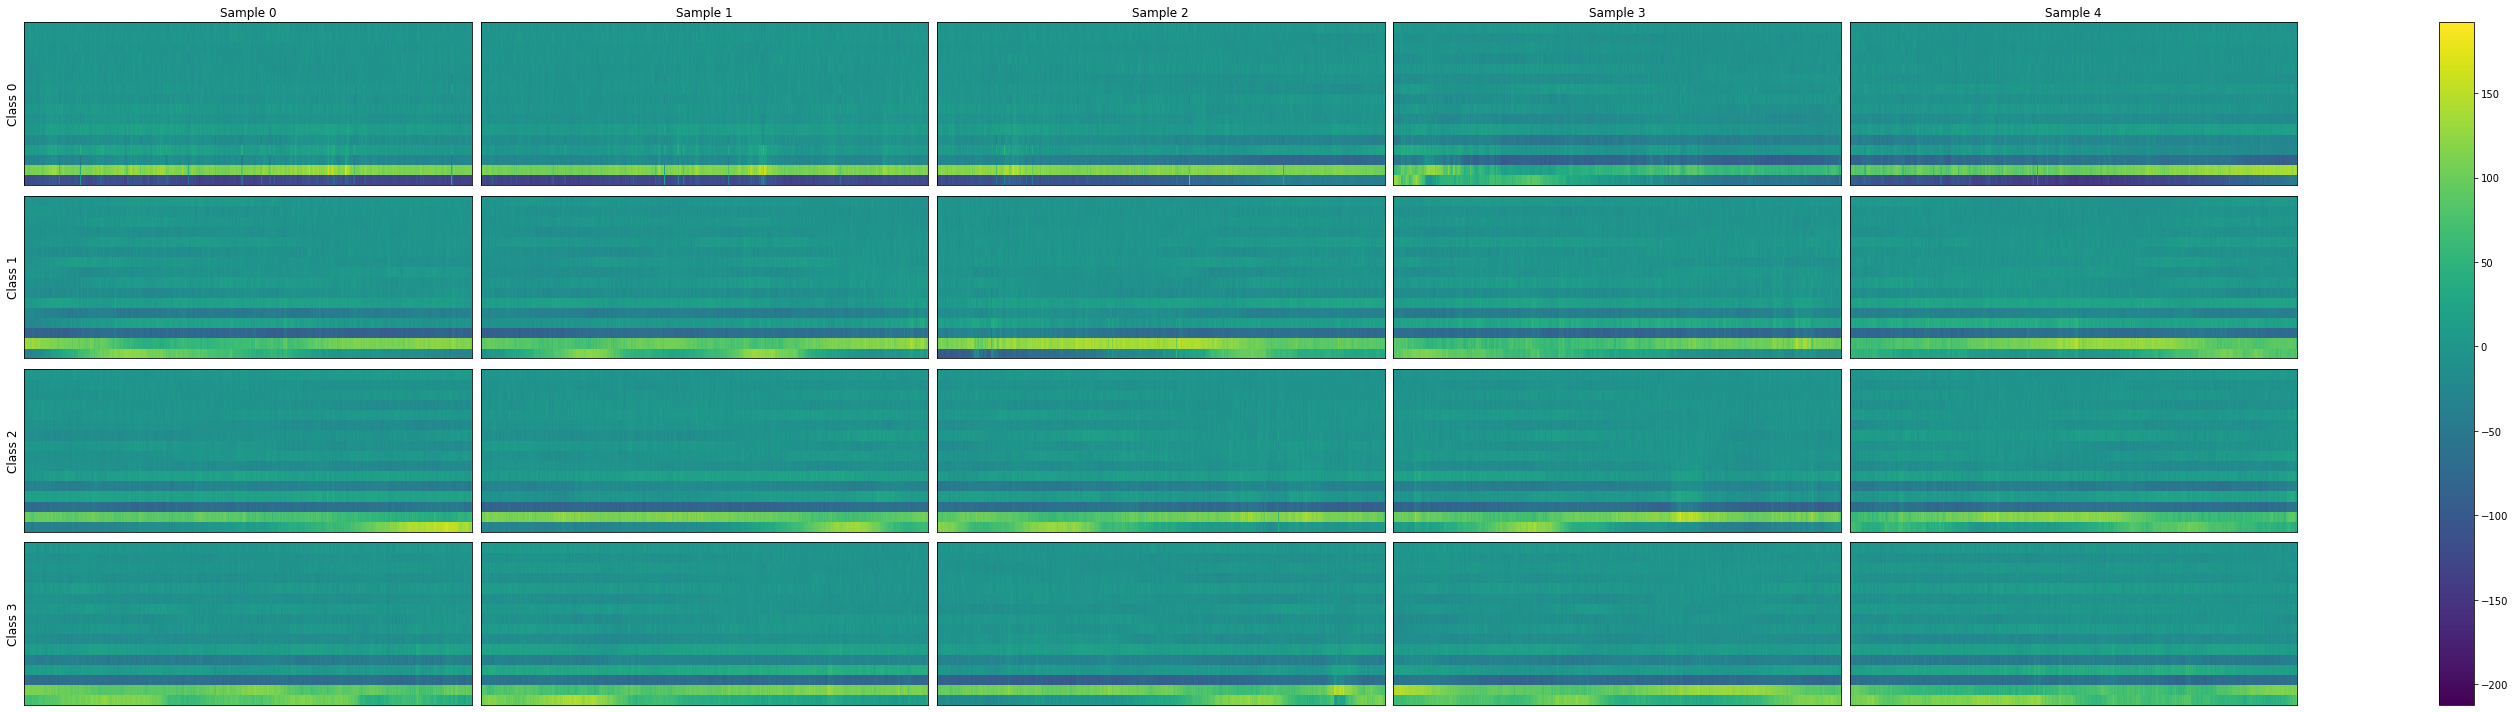

In [54]:
n_classes = len(d)
# n_sampels = min([len(a) for a in d.values()])
n_sampels = 5

vmin = np.inf
vmax = -np.inf

for k, v in d.items():
    for i in v:
        vmin = min(vmin, i.min())
        vmax = max(vmax, i.max())

fig, axes = plt.subplots(n_classes, n_sampels, figsize=(40, n_classes * 2.5))

for i in range(n_classes):
    for j in range(n_sampels):
        if j >= len(d[i]):
            continue
        ax = axes[i, j]
        im = ax.pcolormesh(d[i][j], vmin=vmin, vmax=vmax)
        
        plt.setp(ax.get_xticklabels(), visible=False)
        plt.setp(ax.get_yticklabels(), visible=False)
        ax.tick_params(axis='both', which='both', length=0)

#         axes[i, j].axis('off')
#         axes[i, j].set_title(f'class {i} sample {j}')
#         fig.colorbar(im, ax=axes[i, j])

cols = [f'Sample {i}' for i in range(n_sampels)]
rows = [f'Class {i}' for i in range(n_classes)]

for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for ax, row in zip(axes[:, 0], rows):
    ax.set_ylabel(row, size='large')


fig.tight_layout()
fig.colorbar(im, ax=axes.ravel().tolist());

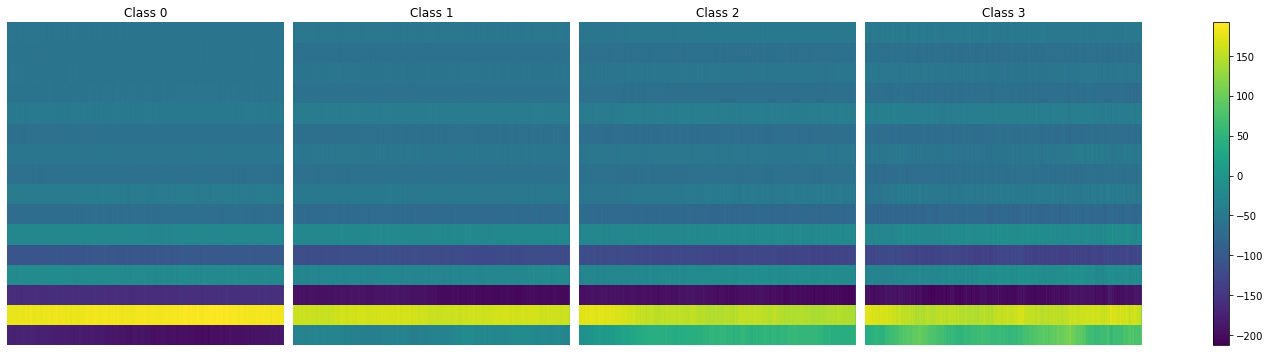

In [55]:
fig, axes = plt.subplots(1, n_classes, figsize=(20, 5))

vmin = np.inf
vmax = -np.inf
for i in range(n_classes):
    avg = torch.stack(d[i]).mean(0)
    vmin = min(vmin, avg.min())
    vmax = max(vmax, avg.max())

for i in range(n_classes):
    avg = torch.stack(d[i]).mean(0)
    axes[i].set_title(f'Class {i}')
    axes[i].pcolormesh(avg, vmin=vmin, vmax=vmax)
    axes[i].axis('off')
#     axes[i].plot(avg.mean(1))

plt.tight_layout()
fig.colorbar(im, ax=axes.ravel().tolist());

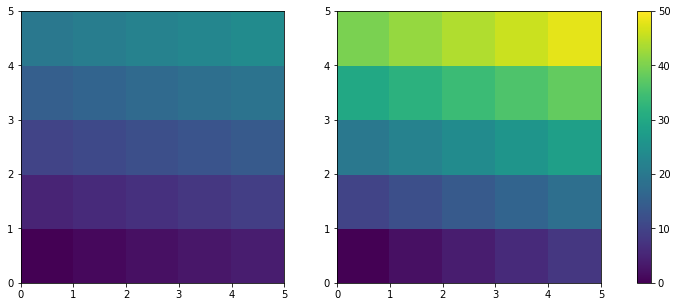

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(13,5))

x1 = np.arange(25).reshape((5, 5))
x2 = x1 * 2

im1 = axes[0].pcolormesh(x1, vmin=0, vmax=50)
im2 = axes[1].pcolormesh(x2, vmin=0, vmax=50)

fig.colorbar(im2, ax=axes.tolist());

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

In [ ]:
X, y = make_classification(n_samples=1000, n_features=2000)
svm = LinearSVC(random_state=0, tol=1e-5)
svm.fit(X, y)
